# Importing all the necessary libraries

In [598]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import prophet as Prophet

# Initializing plotly
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Importing the Dataset & Exploring it

In [599]:
df = pd.read_csv('itc_historical_data.csv')

In [600]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No. of trades
0,14-Feb-2025,EQ,411.75,416.20,408.40,409.70,410.00,410.25,411.41,471.5,407.60,"1,41,24,236","5,81,08,70,731.00","1,99,616"
1,13-Feb-2025,EQ,409.95,413.95,409.00,409.90,410.00,409.70,411.14,471.5,407.60,"1,29,89,029","5,34,03,10,573.90","1,85,598"
2,12-Feb-2025,EQ,413.15,413.80,407.60,418.30,411.20,409.90,410.36,471.5,407.60,"1,38,84,574","5,69,76,74,234.65","2,07,478"
3,11-Feb-2025,EQ,428.80,430.55,417.50,427.20,418.05,418.30,421.57,471.5,417.50,"1,42,88,751","6,02,37,50,310.80","1,87,384"
4,10-Feb-2025,EQ,427.00,433.30,426.50,430.85,427.70,427.20,428.76,471.5,426.50,"1,22,27,140","5,24,24,93,795.80","1,56,939"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,20-Feb-2024,EQ,410.45,410.45,404.30,409.25,406.90,406.10,406.62,499.7,369.65,"1,40,84,218","5,72,69,13,345.05","2,00,707"
248,19-Feb-2024,EQ,405.00,412.75,404.60,404.60,409.20,409.25,410.11,499.7,369.65,"1,69,49,793","6,95,13,57,970.10","1,95,499"
249,16-Feb-2024,EQ,405.00,409.55,399.40,403.90,404.60,404.60,403.76,499.7,369.65,"3,75,18,847","15,14,84,23,499.50","3,02,859"
250,15-Feb-2024,EQ,413.00,414.55,403.15,411.55,404.75,403.90,406.08,499.7,369.65,"2,03,83,983","8,27,75,77,375.40","2,67,030"


In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           252 non-null    object 
 1   series         252 non-null    object 
 2   OPEN           252 non-null    float64
 3   HIGH           252 non-null    float64
 4   LOW            252 non-null    float64
 5   PREV. CLOSE    252 non-null    float64
 6   ltp            252 non-null    float64
 7   close          252 non-null    float64
 8   vwap           252 non-null    float64
 9   52W H          252 non-null    float64
 10  52W L          252 non-null    float64
 11  VOLUME         252 non-null    object 
 12  VALUE          252 non-null    object 
 13  No. of trades  252 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.7+ KB


In [602]:
df.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,457.805952,462.018452,453.483532,457.406746,457.541667,457.420635,457.634603,505.726190,398.780357
std,33.450640,33.931890,33.360694,33.696087,33.663348,33.675839,33.652643,19.379377,15.329836
min,405.000000,406.500000,399.350000,403.350000,401.900000,403.350000,402.120000,461.750000,369.650000
25%,429.075000,432.275000,425.750000,428.862500,428.775000,428.862500,429.260000,499.700000,399.350000
50%,450.000000,457.675000,445.025000,450.775000,450.375000,450.775000,450.745000,499.700000,399.350000
75%,487.012500,492.325000,482.187500,488.012500,488.212500,488.012500,486.237500,528.500000,399.350000
max,520.600000,528.500000,520.250000,522.750000,522.250000,522.750000,524.140000,528.500000,441.250000


# Data Visualization using plotly express: Visualizing the historical data of ITC

In [603]:
px.line(df, x='Date', y='close', title='ITC Historical Performance')

In [604]:
px.area(df, x='Date', y='VOLUME', title='ITC Analysis by Volume')

In [605]:
px.box(df, y='close')

# Using Facebook Prophet to create a model for stock prediction

## Data Preparation

In [606]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No. of trades
0,14-Feb-2025,EQ,411.75,416.20,408.40,409.70,410.00,410.25,411.41,471.5,407.60,"1,41,24,236","5,81,08,70,731.00","1,99,616"
1,13-Feb-2025,EQ,409.95,413.95,409.00,409.90,410.00,409.70,411.14,471.5,407.60,"1,29,89,029","5,34,03,10,573.90","1,85,598"
2,12-Feb-2025,EQ,413.15,413.80,407.60,418.30,411.20,409.90,410.36,471.5,407.60,"1,38,84,574","5,69,76,74,234.65","2,07,478"
3,11-Feb-2025,EQ,428.80,430.55,417.50,427.20,418.05,418.30,421.57,471.5,417.50,"1,42,88,751","6,02,37,50,310.80","1,87,384"
4,10-Feb-2025,EQ,427.00,433.30,426.50,430.85,427.70,427.20,428.76,471.5,426.50,"1,22,27,140","5,24,24,93,795.80","1,56,939"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,20-Feb-2024,EQ,410.45,410.45,404.30,409.25,406.90,406.10,406.62,499.7,369.65,"1,40,84,218","5,72,69,13,345.05","2,00,707"
248,19-Feb-2024,EQ,405.00,412.75,404.60,404.60,409.20,409.25,410.11,499.7,369.65,"1,69,49,793","6,95,13,57,970.10","1,95,499"
249,16-Feb-2024,EQ,405.00,409.55,399.40,403.90,404.60,404.60,403.76,499.7,369.65,"3,75,18,847","15,14,84,23,499.50","3,02,859"
250,15-Feb-2024,EQ,413.00,414.55,403.15,411.55,404.75,403.90,406.08,499.7,369.65,"2,03,83,983","8,27,75,77,375.40","2,67,030"


In [607]:
column = ['Date', 'close']
ndf = pd.DataFrame(df, columns=column)

In [608]:
ndf

,Date,close
0,14-Feb-2025,410.25
1,13-Feb-2025,409.70
2,12-Feb-2025,409.90
3,11-Feb-2025,418.30
4,10-Feb-2025,427.20
...,...,...
247,20-Feb-2024,406.10
248,19-Feb-2024,409.25
249,16-Feb-2024,404.60
250,15-Feb-2024,403.90


In [609]:
prophet_df = ndf.rename(columns={'Date': 'ds', 'close': 'y'})

In [610]:
prophet_df

,ds,y
0,14-Feb-2025,410.25
1,13-Feb-2025,409.70
2,12-Feb-2025,409.90
3,11-Feb-2025,418.30
4,10-Feb-2025,427.20
...,...,...
247,20-Feb-2024,406.10
248,19-Feb-2024,409.25
249,16-Feb-2024,404.60
250,15-Feb-2024,403.90


## Creating Facebook Prophet Model

In [611]:
m = Prophet.Prophet()
m.fit(prophet_df)

02:40:52 - cmdstanpy - INFO - Chain [1] start processing
02:40:52 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

In [612]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [613]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-02-14,407.635745,393.633158,416.118150,407.635745,407.635745,-2.177900,-2.177900,-2.177900,-2.177900,-2.177900,-2.177900,0.0,0.0,0.0,405.457845
1,2024-02-15,408.003186,395.395009,417.835659,408.003186,408.003186,-2.225049,-2.225049,-2.225049,-2.225049,-2.225049,-2.225049,0.0,0.0,0.0,405.778137
2,2024-02-16,408.370626,396.384550,419.161916,408.370626,408.370626,-0.726503,-0.726503,-0.726503,-0.726503,-0.726503,-0.726503,0.0,0.0,0.0,407.644123
3,2024-02-19,409.472947,396.957010,418.668248,409.472947,409.472947,-1.605341,-1.605341,-1.605341,-1.605341,-1.605341,-1.605341,0.0,0.0,0.0,407.867606
4,2024-02-20,409.840388,395.839287,419.167051,409.840388,409.840388,-2.389118,-2.389118,-2.389118,-2.389118,-2.389118,-2.389118,0.0,0.0,0.0,407.451270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2025-03-12,418.147086,402.978791,428.280310,413.258014,423.363957,-2.177900,-2.177900,-2.177900,-2.177900,-2.177900,-2.177900,0.0,0.0,0.0,415.969186
278,2025-03-13,417.589692,403.235951,428.389093,412.486756,423.143617,-2.225049,-2.225049,-2.225049,-2.225049,-2.225049,-2.225049,0.0,0.0,0.0,415.364643
279,2025-03-14,417.032297,402.730550,428.919810,411.606245,422.958176,-0.726503,-0.726503,-0.726503,-0.726503,-0.726503,-0.726503,0.0,0.0,0.0,416.305794
280,2025-03-15,416.474903,411.822606,437.707772,410.669719,422.829203,8.163558,8.163558,8.163558,8.163558,8.163558,8.163558,0.0,0.0,0.0,424.638461


In [614]:
px.line(forecast, x='ds', y='yhat', title='ITC Forecasting')

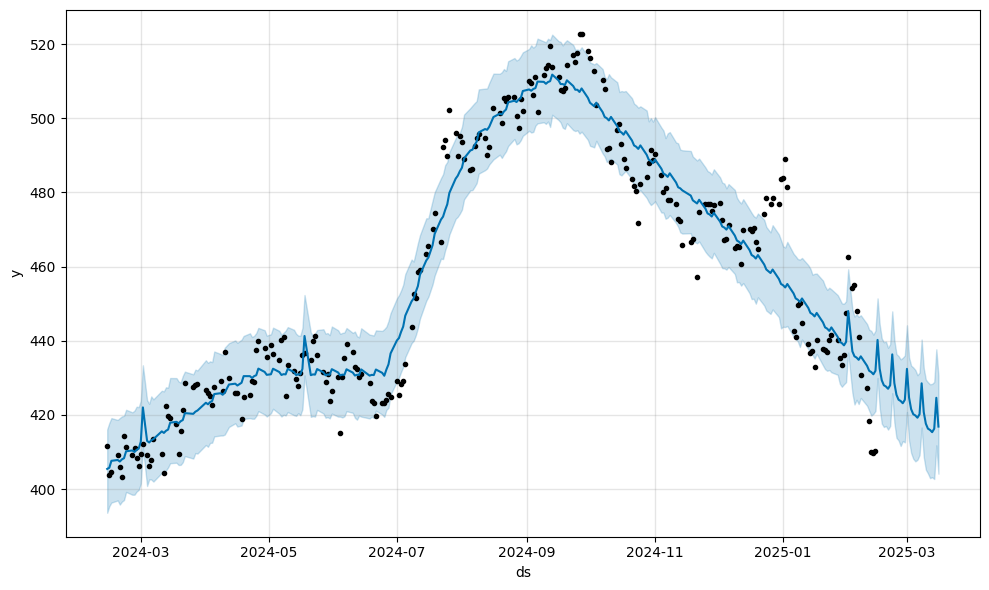

In [615]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

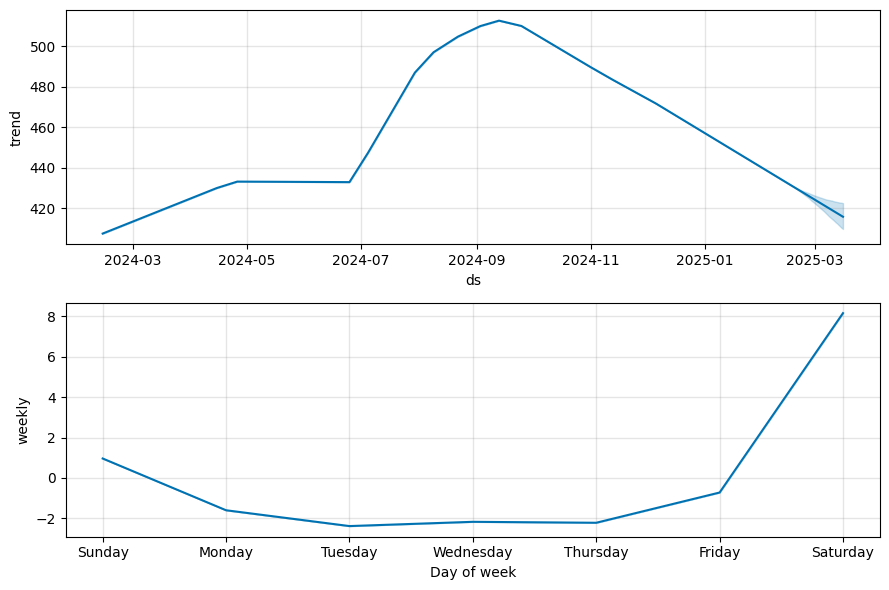

In [616]:
figure_2 = m.plot_components(forecast)

## Save the Forecasted Data 

In [617]:
file = forecast.to_csv('itc_forecast.csv', index=False)

# Forecast Evaluation

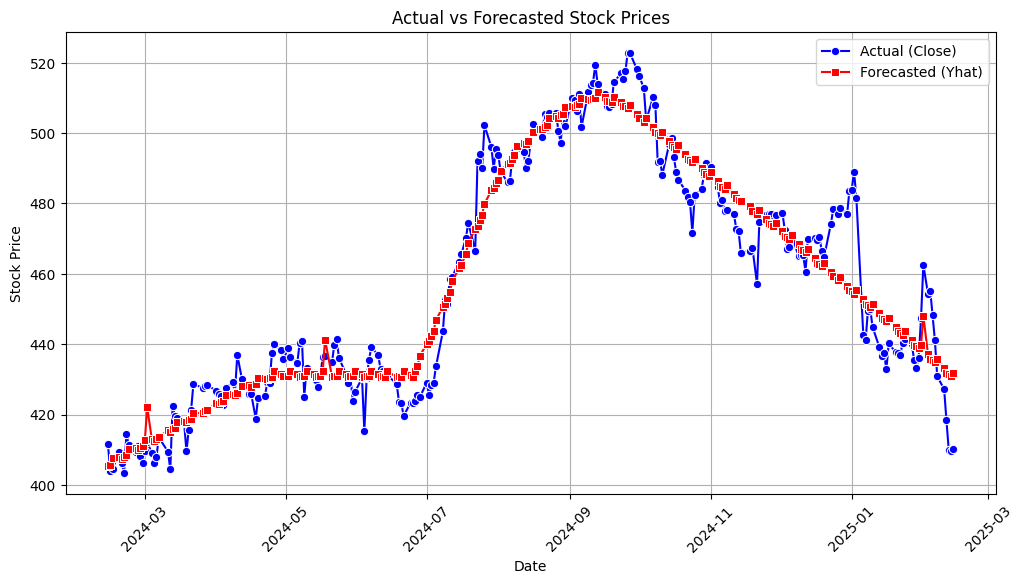

In [618]:
import matplotlib.pyplot as plt
import seaborn as sns

forecast_df = pd.read_csv("itc_forecast.csv")
historical_df = pd.read_csv("itc_historical_data.csv")

forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])
historical_df['Date'] = pd.to_datetime(historical_df['Date'], format='%d-%b-%Y')

merged_df = pd.merge(historical_df, forecast_df, left_on='Date', right_on='ds', how='inner')

# Plot Actual vs Forecasted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_df['Date'], y=merged_df['close'], label="Actual (Close)", marker='o', color='blue')
sns.lineplot(x=merged_df['Date'], y=merged_df['yhat'], label="Forecasted (Yhat)", marker='s', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Forecasted Stock Prices")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [619]:
future_forecast = forecast_df[forecast_df['ds'] > '2025-02-14']

fig = px.line(future_forecast, x='ds', y='yhat', title="Forecasted Stock Prices for 30 Days", labels={'ds': "Date", 'yhat': "Forecasted Price"})
fig.show()

# Fundemental Analysis of ITC

## Financial Performance 

1. Revenue: ₹65,440.81 Cr. (FY 2023-24)  

2. Net Profit: ₹20,421.97 Cr.  

3. Earnings Per Share (EPS TTM): ₹16.51  

4. Cash EPS (CEPS TTM): ₹17.83  

ITC’s revenue has remained stable, with steady profit growth. The company’s strong cigarette business and expanding FMCG segment contribute significantly to its earnings.  

## Profitability Ratios Analysis 

1. A high ROE of 28.31% indicates efficient use of capital.  

2. A PE ratio of 24.87 suggests the stock is fairly valued compared to industry standards.  

3. A PB ratio of 7.04 means the stock trades at a premium, reflecting strong brand value and consistent profits.  

## Price Movement & Liquidity
1. Current Range: ₹408.45 - ₹416.00  
2. 52-Week High/Low: ₹500.01 / ₹377.74  
3. VWAP: ₹412.28  
4. Market Cap: ₹5,13,699.85 Cr.  

The stock is trading closer to its 52-week low, which may present a buying opportunity. High market capitalization ensures stability and strong investor interest.  

## Investment Outlook & Valuation 

1. PE ratio (24.87) is reasonable compared to FMCG peers like HUL and Nestlé.  
2. Strong ROE (28.31%) highlights ITC’s profitability.  
3. Consistent dividend payouts (~90%) make it attractive for income investors.  

## Investment Recommendation 
1. Long-Term Hold: Suitable for investors looking for stable growth and dividends.  
2. Entry Opportunity: Buying below ₹400 could provide good returns.  
3. Low Risk, Steady Growth: A reliable stock with strong financials.  

## Conclusion: Buy for long-term investors, hold for existing shareholders.

# Automating this process for other stocks

Download the historical data of any other stock and replace `itc_historical_data.csv` in the `df` variable to a new csv to automate this process.